In [1]:
%load_ext rpy2.ipython

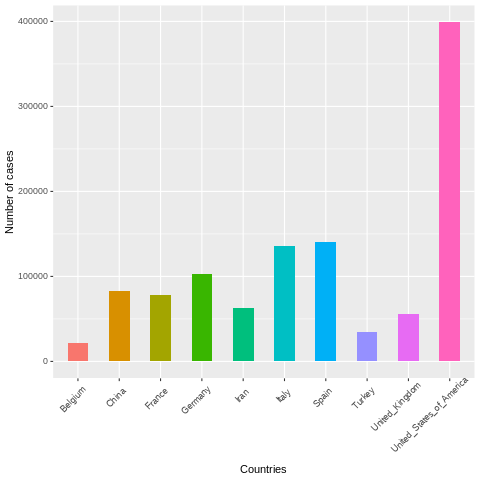

In [3]:
%%R
library(readxl)
covid19_data <- read_excel("COVID-19-geographic-disbtribution-worldwide.xlsx")

total_cases <- aggregate(covid19_data["cases"], covid19_data["countriesAndTerritories"],sum)
sort_data <- total_cases[order(-total_cases$cases),]
top10_coutr <- subset(sort_data[1:10,])

library(ggplot2)
ggplot(top10_coutr,aes(x = countriesAndTerritories, y = cases, fill = countriesAndTerritories)) + 
   geom_bar(stat="identity",width = 0.5) +
   theme(axis.text.x = element_text(angle = 45, hjust = 0.8, vjust = 0.9)) +
   xlab("Countries")+theme(legend.position="none") +
   scale_y_continuous("Number of cases",labels = c("0","100000","200000","300000","400000"))

In [5]:
%%R
CaseAndDeath <- aggregate(c(covid19_data["cases"],covid19_data["deaths"]), covid19_data["countriesAndTerritories"],sum)
CaseAndDeath["deathrate"] <- CaseAndDeath$deaths/CaseAndDeath$cases
sort_deathrate <- CaseAndDeath[order(-CaseAndDeath$deathrate),]
top1_coutr <- subset(sort_deathrate[1,])
print(paste("The country having the highest death rate is",top1_coutr$countriesAndTerritories))
print(paste("The death rate of this country is ",top1_coutr$deathrate))

[1] "The country having the highest death rate is Gambia"
[1] "The death rate of this country is  0.25"


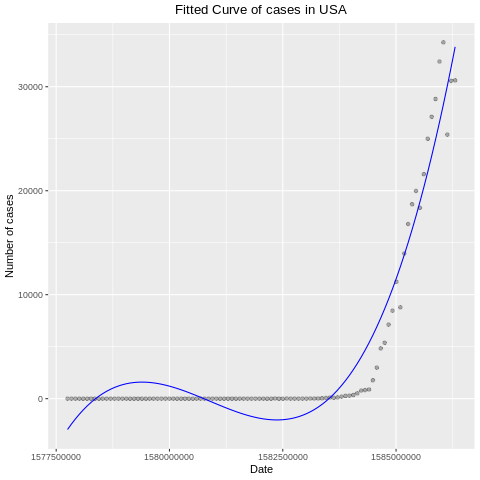

In [14]:
%%R
US_data <- subset(covid19_data, geoId == "US")
US_data$dateRep <- as.numeric(US_data$dateRep)
model <- lm(cases ~ poly(dateRep,3), US_data)
pd_model <- data.frame(US_data$dateRep, model$fitted.values)
ggplot(US_data, aes(x=dateRep, y=cases))+
  geom_point(alpha=0.3,fill='white')+
  geom_line(data=pd_model, aes(y=model.fitted.values,x=US_data.dateRep), colour="blue")+
  labs(title = "Fitted Curve of cases in USA", x = "Date", y = "Number of cases")+
  theme(plot.title = element_text(hjust = 0.5)) 

[1] "The number of patients in different hospitals"


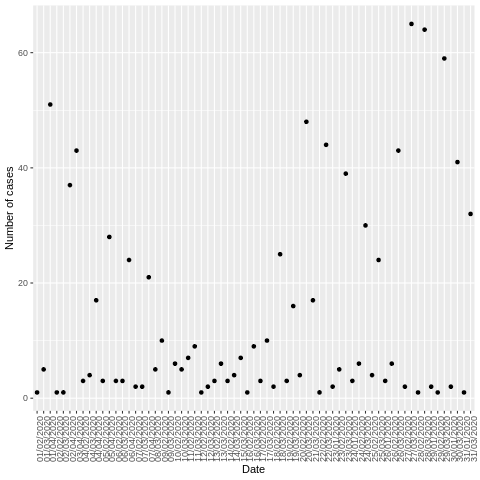

In [16]:
%%R
hk_data <- read.csv("enhanced_sur_covid_19_eng.csv")
summary(hk_data)
print("The number of patients in different hospitals")
sort(table(hk_data$Name.of.hospital.admitted), decreasing = TRUE)

group_data <- table(hk_data$Report.date)
plot_data <- data.frame(group_data)
ggplot(plot_data,aes(x = Var1, y = Freq)) +
  geom_point() +
  theme(axis.text.x = element_text(size = 9, angle = 90))+
  labs(x = "Date", y = "Number of cases")

The top four hospitals which have most patients are Princess Margaret Hospital, Pamela Youde Nethersole Eastern Hospital, United Christian Hospital, and Queen Mary Hospital. The number of patients in these hospitals exceed 100. The total confirmed patienst are 916 Hongkong residents and the others are not. In the plot, The number of cases does not have a significant pattern with the date.